In [48]:
import pandas as pd
import numpy as np

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [49]:
import sqlite3

db_path = "../db.sqlite3"

query = """
SELECT p.name, p.price, o.datetime, oi.quantity
FROM restaurant_orderitem oi
JOIN restaurant_product p ON oi.product_id = p.id
JOIN restaurant_order o ON oi.order_id = o.id
"""

with sqlite3.connect(db_path) as conn:
    combined_df = pd.read_sql_query(query, conn)
    
combined_df.to_csv("restaurant_data.csv", index=False)

df = pd.read_csv("restaurant_data.csv")

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74818 entries, 0 to 74817
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      74818 non-null  object 
 1   price     74818 non-null  float64
 2   datetime  74818 non-null  object 
 3   quantity  74818 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ MB


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

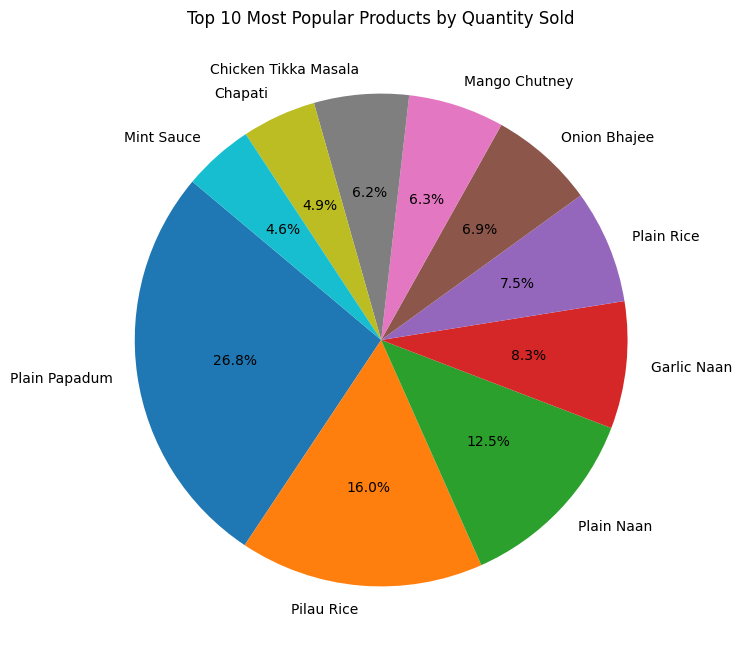

In [51]:
import matplotlib.pyplot as plt

top_products = df.groupby("name")["quantity"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 8))
plt.pie(top_products, labels=top_products.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Most Popular Products by Quantity Sold')

plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

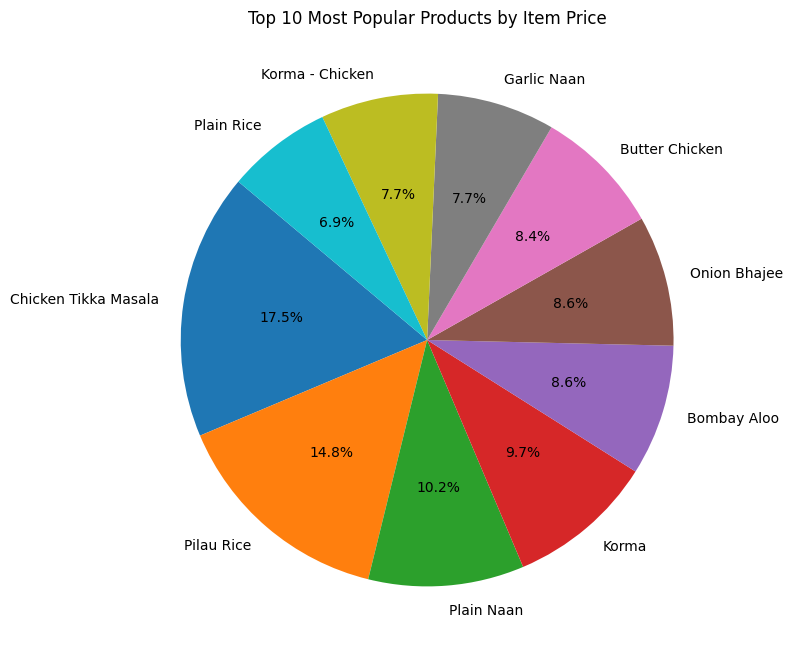

In [52]:
df["item_price"] = df["price"] * df["quantity"]
top10_by_item_price = df.groupby("name")["item_price"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 8))
plt.pie(top10_by_item_price, labels=top10_by_item_price.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Most Popular Products by Item Price')

plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

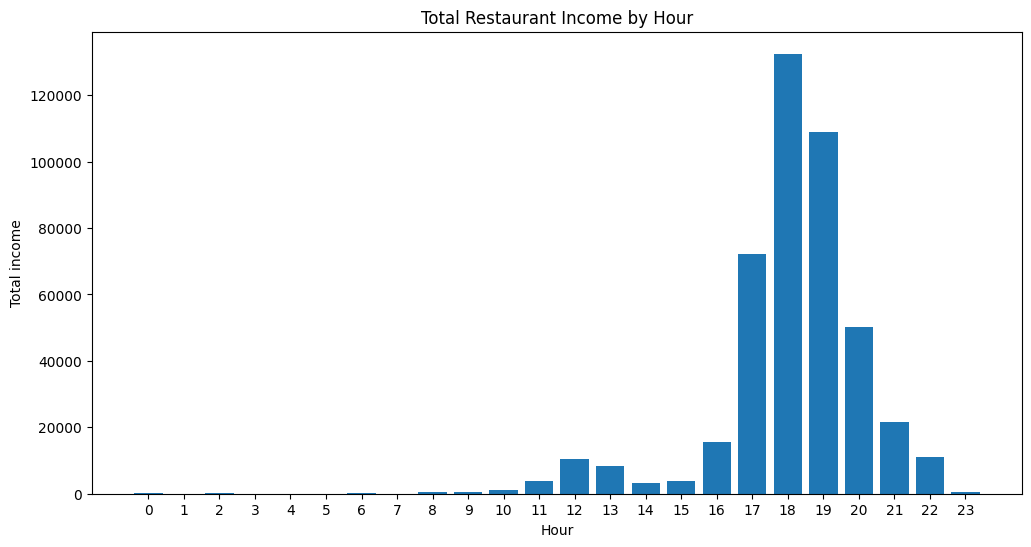

In [57]:
df["datetime"] = pd.to_datetime(df["datetime"])
df["order_hour"] = df["datetime"].dt.hour
income_by_hour = df.groupby("order_hour")["item_price"].sum()


plt.figure(figsize=(12, 6))
plt.bar(income_by_hour.index, income_by_hour)
plt.title("Total Restaurant Income by Hour")
plt.xlabel("Hour")
plt.ylabel("Total income")
plt.xticks(np.arange(24))
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

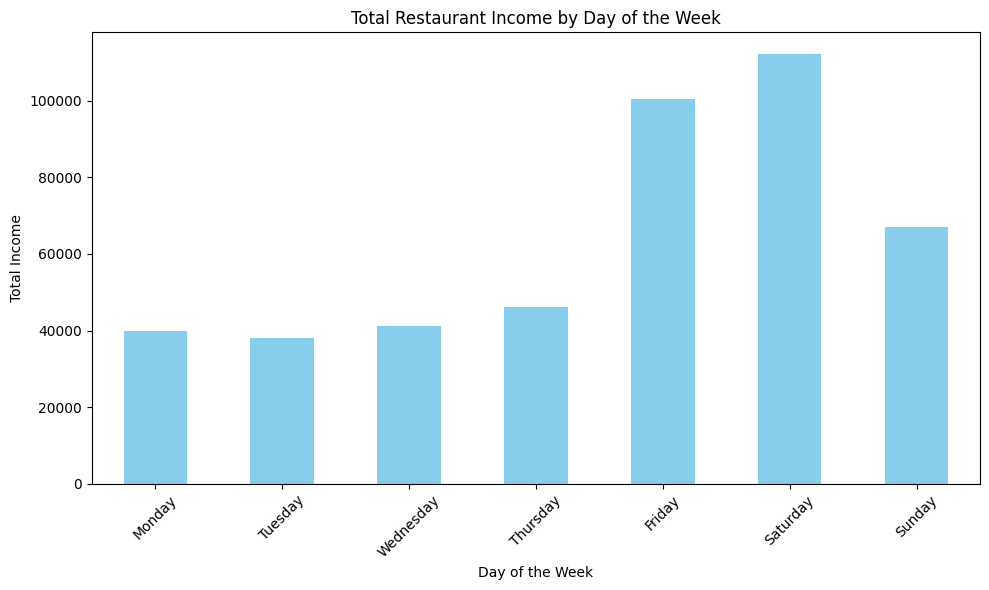

In [56]:
df["day_of_week"] = df["datetime"].dt.day_name()
income_by_day = df.groupby("day_of_week")["item_price"].sum()
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
income_by_day = income_by_day.reindex(ordered_days)

plt.figure(figsize=(10, 6))
income_by_day.plot(kind='bar', color='skyblue')
plt.title('Total Restaurant Income by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Income')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()